# Labib Kamran - 467183 - BSCS13D

# Lab 2: Introduction to Machine Learning



Loading the Data set


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
#load the dataset
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Understanding the Data

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [22]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [23]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Exploring the Target Variable

<Axes: xlabel='target'>

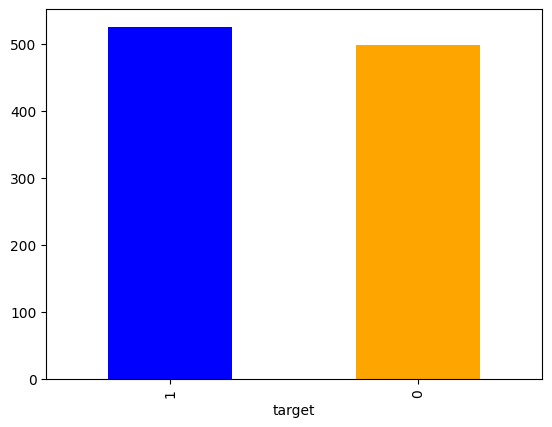

In [24]:
# Count the number of instances for each class (0 = No Heart Disease, 1 = Heart Disease)
data['target'].value_counts().plot(kind='bar', color=['blue', 'orange'])

 Feature Correlation

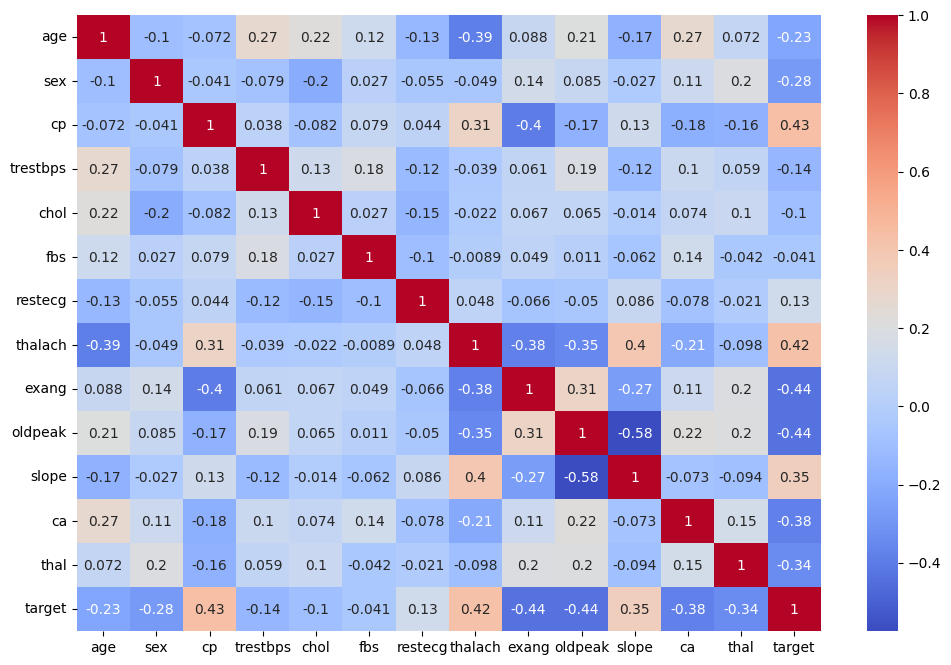

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# Generate a correlation matrix
corr_matrix = data.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Visualizing Distribution of Features

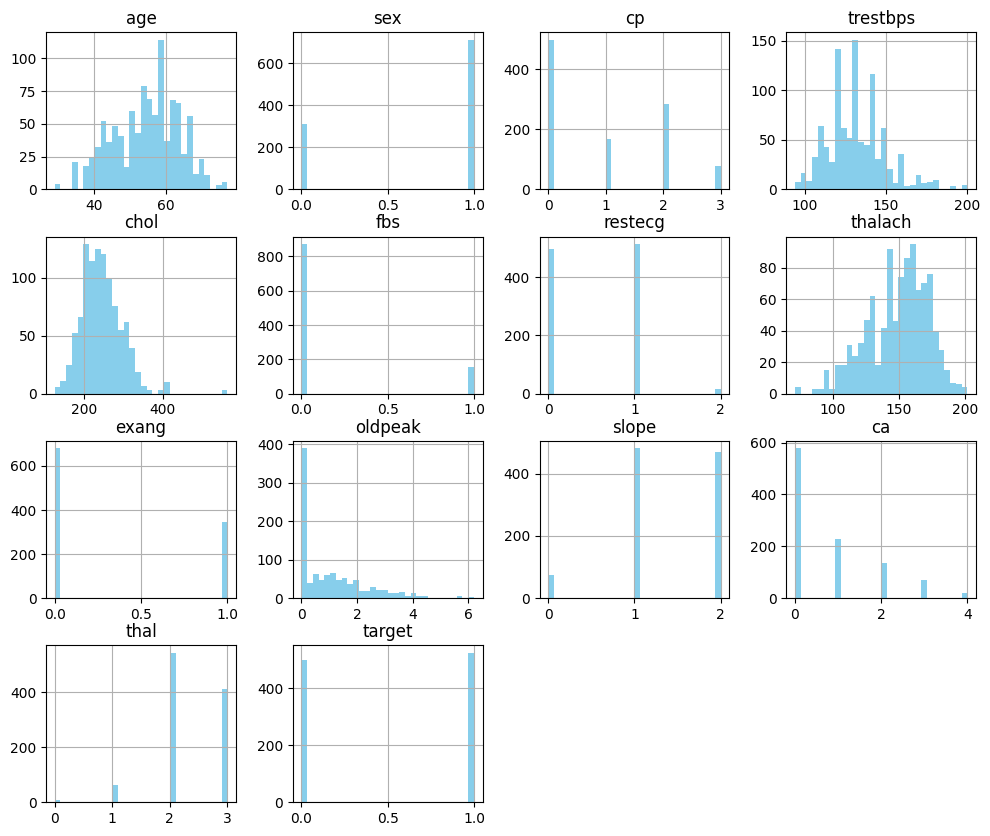

In [26]:
# Plot histograms of all features
data.hist(figsize=(12, 10), bins=30, color='skyblue')
plt.show()

Box Plot

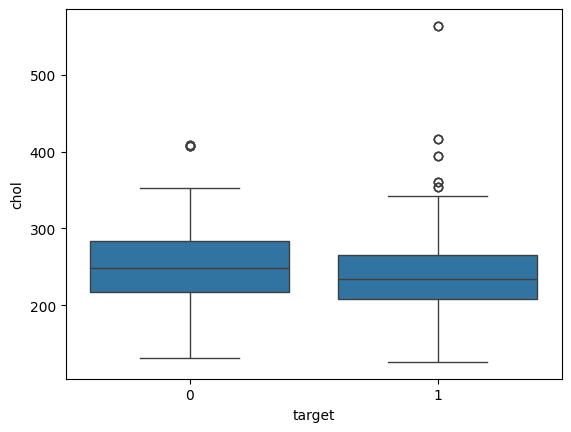

In [27]:
# Box plot of cholesterol levels for patients with and without heart disease
sns.boxplot(x='target', y='chol', data=data)
plt.show()

Pairwise Feature Relationships (Pairplot)

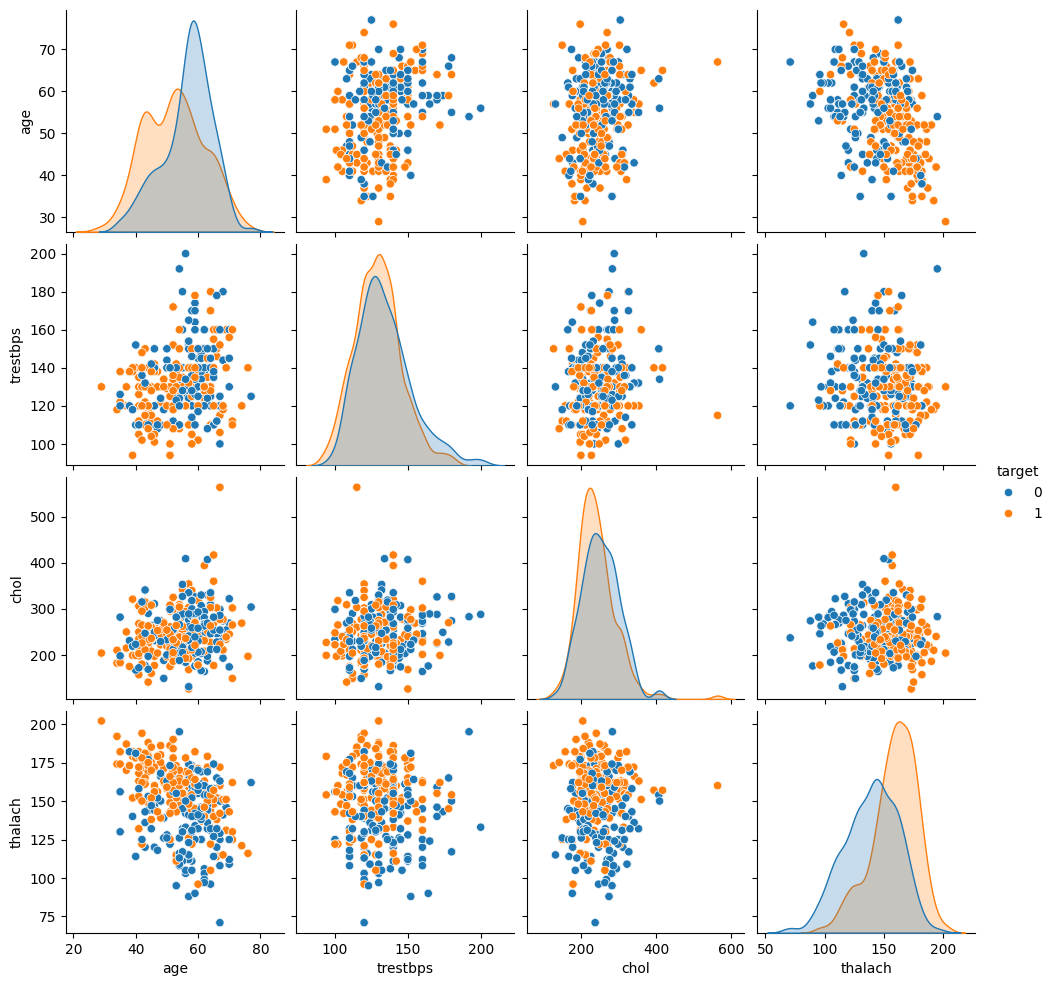

In [28]:
# Pairplot of important features
sns.pairplot(data, hue='target', vars=['age', 'trestbps', 'chol', 'thalach'])
plt.show()

Data Cleaning, Preparing the Data for ML Algorithms

Handling Missing Values

In [29]:
data.fillna(data.mean(), inplace=True) # Replace missing values with the mean

 Encoding Categorical Features (if any)

In [31]:
data = pd.get_dummies(data, columns=['cp', 'thal'], drop_first=True)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['age', 'trestbps', 'chol']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[cols_to_scale])

# Put scaled features back into the DataFrame (as new columns)
import pandas as pd
scaled_df = pd.DataFrame(scaled_data, columns=[f'{c}_scaled' for c in cols_to_scale], index=data.index)
data = pd.concat([data, scaled_df], axis=1)

data[[f'{c}_scaled' for c in cols_to_scale]].head()

,age_scaled,trestbps_scaled,chol_scaled
0,-0.268437,-0.377636,-0.659332
1,-0.158157,0.479107,-0.833861
2,1.716595,0.764688,-1.396233
3,0.724079,0.936037,-0.833861
4,0.834359,0.364875,0.930822


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

Dealing with Outliers

In [38]:
# Remove rows with outliers based on a threshold
data = data[data['chol'] < 400]

Selecting, Training, Fine-Tuning a ML Model

Training the Model

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Split the data
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


7d) Fine-Tuning the Model

In [41]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Stratified K-Fold for balanced CV splits
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Expanded hyperparameter grid for a more thorough search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Use ROC AUC as a robust binary classification metric
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Run the search
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV ROC AUC:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1:", f1_score(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV ROC AUC: 0.9990498415044702

Test Accuracy: 1.0
Test F1: 1.0
Test ROC AUC: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       103

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203


Confusion Matrix:
 [[100   0]
 [  0 103]]
